Introduction: We are Team Thomas Greville, with members:
Yazda Cokgor (yscokgor@berkeley.edu, GIT username: yscokgor)
etc.

Topic & GOur topic is the analysis of AIDS/ HIVs in Botswana.
als: 

Our project focused on anthe effect of AIDS/  HIV on populations, the difference in AIDS/ HIV prevelance on the sexes, on agriculture and exploring why this may be the case and how it differs in opposed to Zimbabwe.

Enjoy our code!1]

[Goal 2]

In [1]:
#Installation of datahubs necessary
%pip install wbdata
import wbdata

%pip install cufflinks # IF NECESSARY
import cufflinks as cf
cf.go_offline()

import numpy as np

#Botswana Code is "BWA"
#Zimbabwe Code is "ZWE"

  Using cached wbdata-1.0.0-py3-none-any.whl (18 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached tabulate-0.8.10-py3-none-any.whl (29 kB)
  Using cached backoff-2.2.1-py3-none-any.whl (15 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
  Using cached decorator-5.1.1-py3-none-any.whl (9.1 kB)
  Using cached dateparser-1.2.0-py2.py3-none-any.whl (294 kB)
  Using cached tzlocal-5.2-py3-none-any.whl (17 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.9
    Uninstalling decorator-5.0.9:
      Successfully uninstalled decorator-5.0.9
Note: you may need to restart the kernel to use updated packages.


Key '-1293027931673688465' not in persistent cache.
Key '-3387334333153901916' not in persistent cache.
Key '4472715109719276110' not in persistent cache.
Key '-1729417849288984929' not in persistent cache.
Key '-4421840461519480728' not in persistent cache.
Key '-6284121795823717888' not in persistent cache.
Key '-2056711253847432522' not in persistent cache.
Key '-2163115421006911588' not in persistent cache.
Key '6808764607501733752' not in persistent cache.
Key '-7391559774551926475' not in persistent cache.
Key '6547041215615426900' not in persistent cache.
Key '-5128693505199788646' not in persistent cache.
Key '2146077811498323224' not in persistent cache.
Key '8625647508992442171' not in persistent cache.
Key '-1298624600615567361' not in persistent cache.
Key '6417097179752364485' not in persistent cache.
Key '2025478181940735846' not in persistent cache.
Key '5288374581897583390' not in persistent cache.
Key '-6733860273061364531' not in persistent cache.
Key '-53906975060159

  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Getting Indicator for Gender Statistics 
wbdata.get_sources()

gen_stats = 14
indicators_genstat = wbdata.get_indicators (source = gen_stats)
indicators_genstat

Key '3161272958782712511' not in persistent cache.


id                         name
-------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
account.t.d                Account (% age 15+)
account.t.d.1              Account, female (% age 15+)
account.t.d.2              Account, male (% age 15+)
borrow.any                 Borrowed any money (% age 15+)
borrow.any.1               Borrowed any money, female (% age 15+)
borrow.any.2               Borrowed any money, male (% age 15+)
fin1.1a                    First financial institution account ever was opened to receive a wage payment (% age 15+)
fin1.1ab                   First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)
fin1.1b                    First financial institution ever account was opened to receive money from the government (% age 15+)
fin1.t.d     

In [3]:
#Getting Indicator for Health Nutririon and Population Statistics 
health_nut = 16
indicators_healthnut = wbdata.get_indicators (source = health_nut)
indicators_healthnut

id                    name
--------------------  ----------------------------------------------------------------------------------------------------------------------------------------
HD.HCI.OVRL           Human Capital Index (HCI) (scale 0-1)
HD.HCI.OVRL.FE        Human Capital Index (HCI), Female (scale 0-1)
HD.HCI.OVRL.LB        Human Capital Index (HCI), Lower Bound (scale 0-1)
HD.HCI.OVRL.LB.FE     Human Capital Index (HCI), Female, Lower Bound (scale 0-1)
HD.HCI.OVRL.LB.MA     Human Capital Index (HCI), Male, Lower Bound (scale 0-1)
HD.HCI.OVRL.MA        Human Capital Index (HCI), Male (scale 0-1)
HD.HCI.OVRL.UB        Human Capital Index (HCI), Upper Bound (scale 0-1)
HD.HCI.OVRL.UB.FE     Human Capital Index (HCI), Female, Upper Bound (scale 0-1)
HD.HCI.OVRL.UB.MA     Human Capital Index (HCI), Male, Upper Bound (scale 0-1)
NY.GNP.PCAP.CD        GNI per capita, Atlas method (current US$)
SE.ADT.1524.LT.FM.ZS  Literacy rate, youth (ages 15-24), gender parity index (GPI)
SE.ADT

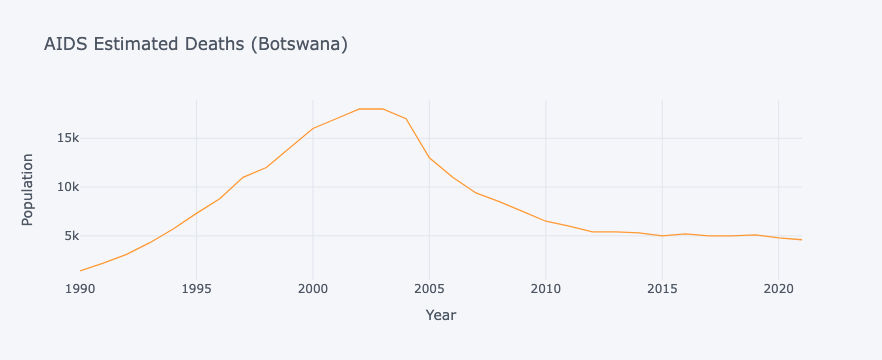

In [4]:
#Aids Estimated Deaths Plotted (Botswana)

aids_death = {"SH.DYN.AIDS.DH" : "BWA"}
aids = wbdata.get_dataframe(aids_death, country = "BWA")
aids.index = aids.index.astype(int)
aids = aids .dropna().sort_index()
aids.iplot(title="AIDS Estimated Deaths (Botswana)",xTitle='Year',yTitle='Population')

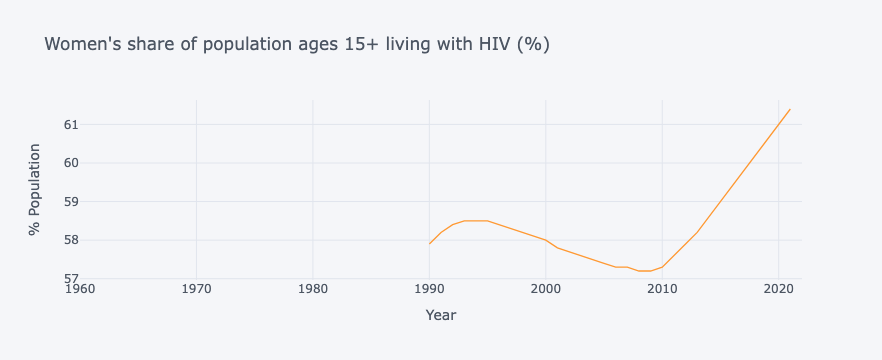

In [5]:
# Women's share of population ages 15+ living with HIV (%) (Botswana)

woman_hiv = {"SH.DYN.AIDS.FE.ZS" : "BWA"}
whiv = wbdata.get_dataframe(woman_hiv, country = "BWA")

whiv.index = whiv.index.astype(int)
whiv.iplot(title="Women's share of population ages 15+ living with HIV (%)",xTitle='Year',yTitle='% Population')


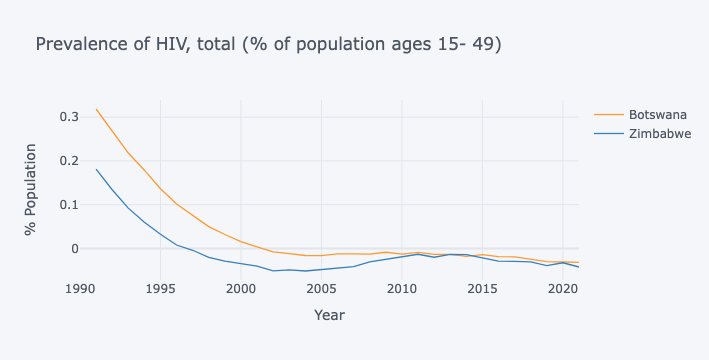

In [6]:
#prevelance of HIV total (% of population ages 15- 49) for both Botswana and Zimbabwe

labels = {"SH.DYN.AIDS.ZS" : "Prevelance of HIV, total (% of population ages 15 - 49)"}

countries =  {"BWA" : "Botswana",
            "ZWE" : "Zimbabwe",
           }

data = wbdata.get_dataframe(labels, country = countries).squeeze().dropna()

data = data.unstack('country')
data.index = data.index.astype(int)
data = data.sort_index()

np.log(data).diff().iplot(title = "Prevalence of HIV, total (% of population ages 15- 49)",
                          yTitle = "% Population",
                          xTitle = "Year")

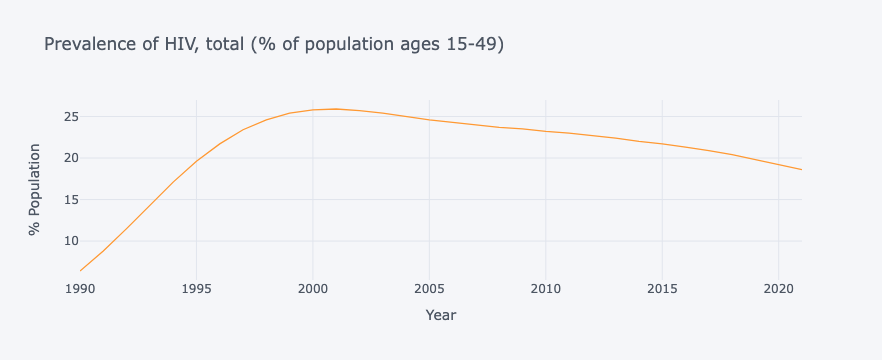

In [7]:
#Prevalence of HIV, total (% of population ages 15-49) (Botswana)
hiv_prev = {"SH.DYN.AIDS.ZS" : "BWA"}
prev = wbdata.get_dataframe(hiv_prev, country = "BWA")

prev = prev.dropna().sort_index()
prev.index = prev.index.astype(int)
prev.iplot(title ="Prevalence of HIV, total (% of population ages 15-49)",xTitle='Year',yTitle='% Population')

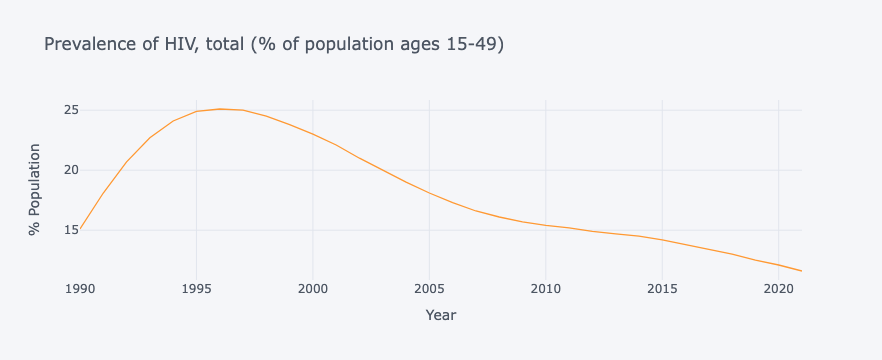

In [8]:
#Prevelance of HIV total (% of pop. ages 15 -49) (Zimbabwe)

wbdata.get_countries("ZWE")


hiv_prevz = {"SH.DYN.AIDS.ZS" : "ZWE"}
prevz = wbdata.get_dataframe(hiv_prevz, country = "ZWE")
prevz = prevz.dropna().sort_index()
prevz.index = prevz.index.astype(int)
prevz.iplot(title ="Prevalence of HIV, total (% of population ages 15-49)",xTitle='Year',yTitle='% Population')

In [9]:
def pop_pyramid_df(years, ctry):
    age_rangez = []
    # Ranges top out at 80, and go in five year increments
    for i in years:
        age_rangez.append(f"{i:02d}"+f"{i+4:02d}")
    
    age_rangez.append("80UP")
    
    male_variablez = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_rangez}
    female_variablez = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_rangez}
    
    variablez = male_variablez
    variablez.update(female_variablez)
    
    dfz = wbdata.get_dataframe(variablez,country=ctry)
    return df.query("date=='2020'").sum(axis=0)

pop_pyramid_df(range(0,80,5), "ZWE")

import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

py.init_notebook_mode(connected=True)

layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))


year = 2020

binz = [go.Bar(x = dfz.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_rangez],
               orientation='h',
               name='Men',
               marker=dict(color='teal'),
               hoverinfo='skip'
               ),

        go.Bar(x = -dfz.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_rangez],
               orientation='h',
               name='Women',
               marker=dict(color='pink'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=binz, layout=layout))


years = range(2020,1960,-10)

# This makes a list of graphs, year by year
binz = [go.Bar(x = dfz.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_rangez],
               orientation='h',
               name='Men {:d}'.format(year),
               hoverinfo='skip'
              )
        for year in years]

binz += [go.Bar(x = -dfz.loc[str(year),:].filter(regex="Female").values,
                y=[int(s[:2])+1 for s in age_rangez],
                orientation='h',
                name='Women {:d}'.format(year),
                hoverinfo='skip',
               )
         for year in years]

py.iplot(dict(data=binz, layout=layout))


NameError: name 'df' is not defined

In [ ]:
def pop_pyramid_df(years, ctry):
    age_rangez = []
    # Ranges top out at 80, and go in five year increments
    for i in years:
        age_rangez.append(f"{i:02d}"+f"{i+4:02d}")
    
    age_rangez.append("80UP")
    
    male_variablez = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_rangez}
    female_variablez = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_rangez}
    
    variablez = male_variablez
    variablez.update(female_variablez)
    
    dfz = wbdata.get_dataframe(variablez,country=ctry)
    return df.query("date=='2020'").sum(axis=0)

pop_pyramid_df(range(0,80,5), "BWA")

import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

py.init_notebook_mode(connected=True)

layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))
year = 2020

bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='blue'),
               hoverinfo='skip'
               ),

        go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='orange'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))

#Gets pop. pyramid by year 
years = range(2020,1960,-10)

bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men {:d}'.format(year),
               hoverinfo='skip'
              )
        for year in years]
          
bins += [go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
                y=[int(s[:2])+1 for s in age_ranges],
                orientation='h',
                name='Women {:d}'.format(year),
                hoverinfo='skip',
               )
         for year in years]

py.iplot(dict(data=bins, layout=layout))


In [ ]:
from eep153_tools.sheets import read_sheets
from functools import cache
import pandas as pd 

@cache
def get_ag_data():
    """Read a bunch of google worksheets into a dictionary of dataframes"""
    data = read_sheets('https://docs.google.com/spreadsheets/d/1IL9BYacvhs6oIOAnp2KWYdTsoqIqReA2jGRlpheB9kQ/',sheet='Wide format data')

    Data = {'Country':'Country/territory','WDI Code':'ISO3','Year':'Year','Output':'Outall_Index','TFP':'TFP_Index','Land':'Land_Index','Labor':'Labor_Index','Capital':'Capital_Index','Materials':'Materials_Index'}

    df = data.rename(columns={v:k for k,v in Data.items()})
    df = df[Data.keys()].set_index(['WDI Code','Country','Year'])

    # Deal with some duplicate indices (drops regions)
    df = df.loc[~df.index.duplicated(),:]

    return df

In [ ]:
!pip install eep153_tools
!pip install python_gnupg

from eep153_tools.sheets import decrypt_credentials
decrypt_credentials('./students.json.gpg')

In [ ]:
!ls ~/.eep153.service_accounts/

In [ ]:
pwd

In [ ]:
ls

In [ ]:
cd

In [ ]:

cd EEP153_Materials/

In [ ]:
ls

In [ ]:
from eep153_tools.sheets import read_sheets
from functools import cache
import pandas as pd 

@cache
def get_ag_data():
    """Read a bunch of google worksheets into a dictionary of dataframes"""
    data = read_sheets('https://docs.google.com/spreadsheets/d/1IL9BYacvhs6oIOAnp2KWYdTsoqIqReA2jGRlpheB9kQ/',sheet='Wide format data')

    Data = {'Country':'Country/territory','WDI Code':'ISO3','Year':'Year','Output':'Outall_Index','TFP':'TFP_Index','Land':'Land_Index','Labor':'Labor_Index','Capital':'Capital_Index','Materials':'Materials_Index'}

    df = data.rename(columns={v:k for k,v in Data.items()})
    df = df[Data.keys()].set_index(['WDI Code','Country','Year'])

    # Deal with some duplicate indices (drops regions)
    df = df.loc[~df.index.duplicated(),:]

    return df

In [ ]:
import cufflinks as cf
cf.go_offline()

df = get_ag_data()

df['Output'].unstack().T.iplot(title="X", yTitle='Y title', xTitle='Year')

In [ ]:
import numpy as np

world = df.xs('World',level='Country').replace(0,np.nan).dropna(how='any')

# Drop unnecessary index levels
world = world.droplevel(['WDI Code'])

# Put in log differences
dworld = np.log(world).diff()
dworld['Inputs'] = dworld['Output'] - dworld['TFP']

dworld.mean()

In [ ]:
select = df.xs('BWA',level='WDI Code').dropna(how='any')

# Drop unnecessary index levels
select = select.droplevel(['Country'])

dselect = np.log(select).diff()
dselect['Inputs'] = dselect['Output'] - dselect['TFP']

dselect.mean()

In [ ]:
select = df.xs('BWA',level='WDI Code').dropna(how='any').droplevel(['Country'])

select = select/select.loc[1961,:]
select.iplot(xTitle="Year", yTitle="Growth Rates", title="Growth Rates of Outputs, Inputs and TFP in Botswana since 1961")

In [ ]:
vars= {"AG.PRD.CREL.MT": "Cereal production"}

use = ["ZWE"]

cereals = fix_date_index(wbdata.get_dataframe(vars, country=use))
cereals.iplot(xTitle="Year", yTitle="Metric Tons", title="Cereal Production in Zimbawae Over Time")

NameError: name 'plt' is not defined

In [13]:
import matplotlib.pyplot as plt
cf.go_offline()
import seaborn as sns

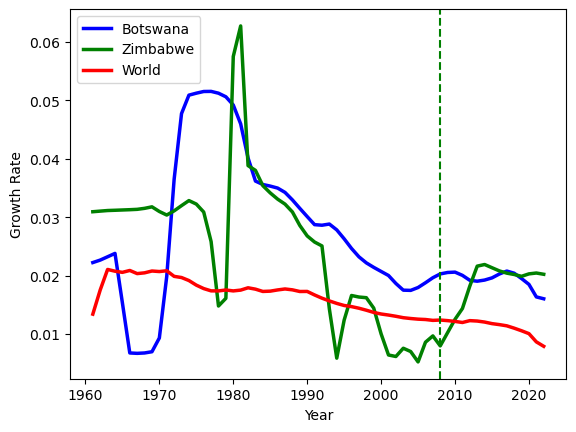

In [18]:
variable_labels = {"SP.POP.TOTL":"Population"}

# Three letter codes come from wbdata.get_country()
countries = {"WLD":"World",
             "ZWE":"Zimbabwe", "BWA" :"Botswana"
            }

df = wbdata.get_dataframe(variable_labels, country = countries).squeeze()

df = df.unstack('country')
# Date index is of type string; change to integers
df.index = df.index.astype(int)

# Differences (over time) in logs give us growth rates
new_df = np.log(df).diff()

# Useful arguments to pass include xTitle, yTitle, Title
fig, ax = plt.subplots()
sns.lineplot(data=new_df, x="date", y="Botswana", 
             label = 'Botswana', color='blue', linewidth=2.5, dashes=(5, 1), ax = ax)
sns.lineplot(data=new_df, x="date", y="Zimbabwe", 
             label = 'Zimbabwe', color='green', linewidth=2.5, ax = ax)
sns.lineplot(data=new_df, x="date", y="World", 
             label = 'World', color='red', linewidth=2.5, ax = ax)
plt.axvline(x = 2008, color = 'green', linestyle = '--')
ax.set(xlabel='Year', ylabel='Growth Rate');

In [ ]:
variable_labels = {"SH.DYN.AIDS.ZS" : "Prevelance of HIV, total (% of population ages 15 - 49)"}

# Three letter codes come from wbdata.get_country()
countries = {"WLD":"World",
             "ZWE":"Zimbabwe", "BWA" :"Botswana"
            }

df = wbdata.get_dataframe(variable_labels, country = countries).squeeze()

df = df.unstack('country')
# Date index is of type string; change to integers
df.index = df.index.astype(int)


# Differences (over time) in logs give us growth rates
new_df = np.log(df).diff()
new_df = new_df[new_df >= 0]

# Useful arguments to pass include xTitle, yTitle, Title
fig, ax = plt.subplots()
sns.lineplot(data=new_df, x="date", y="Botswana", 
             label = 'Botswana', color='blue', linewidth=2.5, dashes=(5, 1), ax = ax)
sns.lineplot(data=new_df, x="date", y="Zimbabwe", 
             label = 'Zimbabwe', color='green', linewidth=2.5, ax = ax)
sns.lineplot(data=new_df, x="date", y="World", 
             label = 'World', color='red', linewidth=2.5, ax = ax)
plt.axvline(x = 2008, color = 'green', linestyle = '--')
ax.set(xlabel='Year', ylabel='Prevelance of HIV, total (% of population ages 15 - 49)');